# Additional Visualizations
Section: d. Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

**Part of:** [marketing_campaign_082825_working.ipynb](./marketing_campaign_082825_working.ipynb)

In [1]:
# Setup and data loading
from utils import ProjectConfig, load_intermediate_results, save_project_figure, reset_plot_settings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

config = ProjectConfig()
# Load data from previous notebook
df = load_intermediate_results("data_from_08_step_6.pkl", config)


## d. Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

In [2]:
# Children at Home vs Total Expenditure Analysis
# Investigating patterns between household children count and spending behavior

# Examine the data
print("CHILDREN AT HOME vs TOTAL EXPENDITURE ANALYSIS")
print("=" * 60)

# print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {len(df)}")

# Data summaries
print("\nDATA SUMMARIZATION")
print("-" * 30)

print(f"Children count range: {df['Total_Children'].min()} to {df['Total_Children'].max()}")
print(f"Expenditure range: ${df['Total_Spending'].min()} to ${df['Total_Spending'].max()}")

# Examine distribution of children
children_dist = df['Total_Children'].value_counts().sort_index()
print("\nDistribution of children at home:")
for children, count in children_dist.items():
    percentage = (count / len(df)) * 100
    print(f"  {children} children: {count:4d} households ({percentage:5.1f}%)")

# Calculate summary statistics by number of children
print("\nSUMMARY STATISTICS BY CHILDREN COUNT")
print("-" * 45)

print(df.groupby('Total_Children')['Total_Spending'].describe().round(2))

CHILDREN AT HOME vs TOTAL EXPENDITURE ANALYSIS
Total Records: 2229

DATA SUMMARIZATION
------------------------------
Children count range: 0 to 3
Expenditure range: $5 to $2525

Distribution of children at home:
  0 children:  633 households ( 28.4%)
  1 children: 1123 households ( 50.4%)
  2 children:  420 households ( 18.8%)
  3 children:   53 households (  2.4%)

SUMMARY STATISTICS BY CHILDREN COUNT
---------------------------------------------
                 count     mean     std  min    25%     50%     75%     max
Total_Children                                                             
0                633.0  1106.37  642.97  6.0  636.0  1189.0  1587.0  2525.0
1               1123.0   473.22  477.20  5.0   64.0   306.0   805.0  2194.0
2                420.0   246.28  311.63  9.0   45.0    92.5   316.5  1750.0
3                 53.0   274.60  414.28  8.0   35.0    88.0   348.0  1616.0


In [3]:
# Correlation analysis
correlation = df['Total_Children'].corr(df['Total_Spending'])
print(f"\nPearson correlation coefficient: {correlation:.4f}")
print(f"Correlation interpretation: {'Strong negative' if correlation < -0.5 else 'Moderate negative' if correlation < -0.3 else 'Weak negative' if correlation < 0 else 'Positive'}")


Pearson correlation coefficient: -0.4995
Correlation interpretation: Moderate negative


Saved: figures\Children_at_Home_vs_Total_Expenditure.png


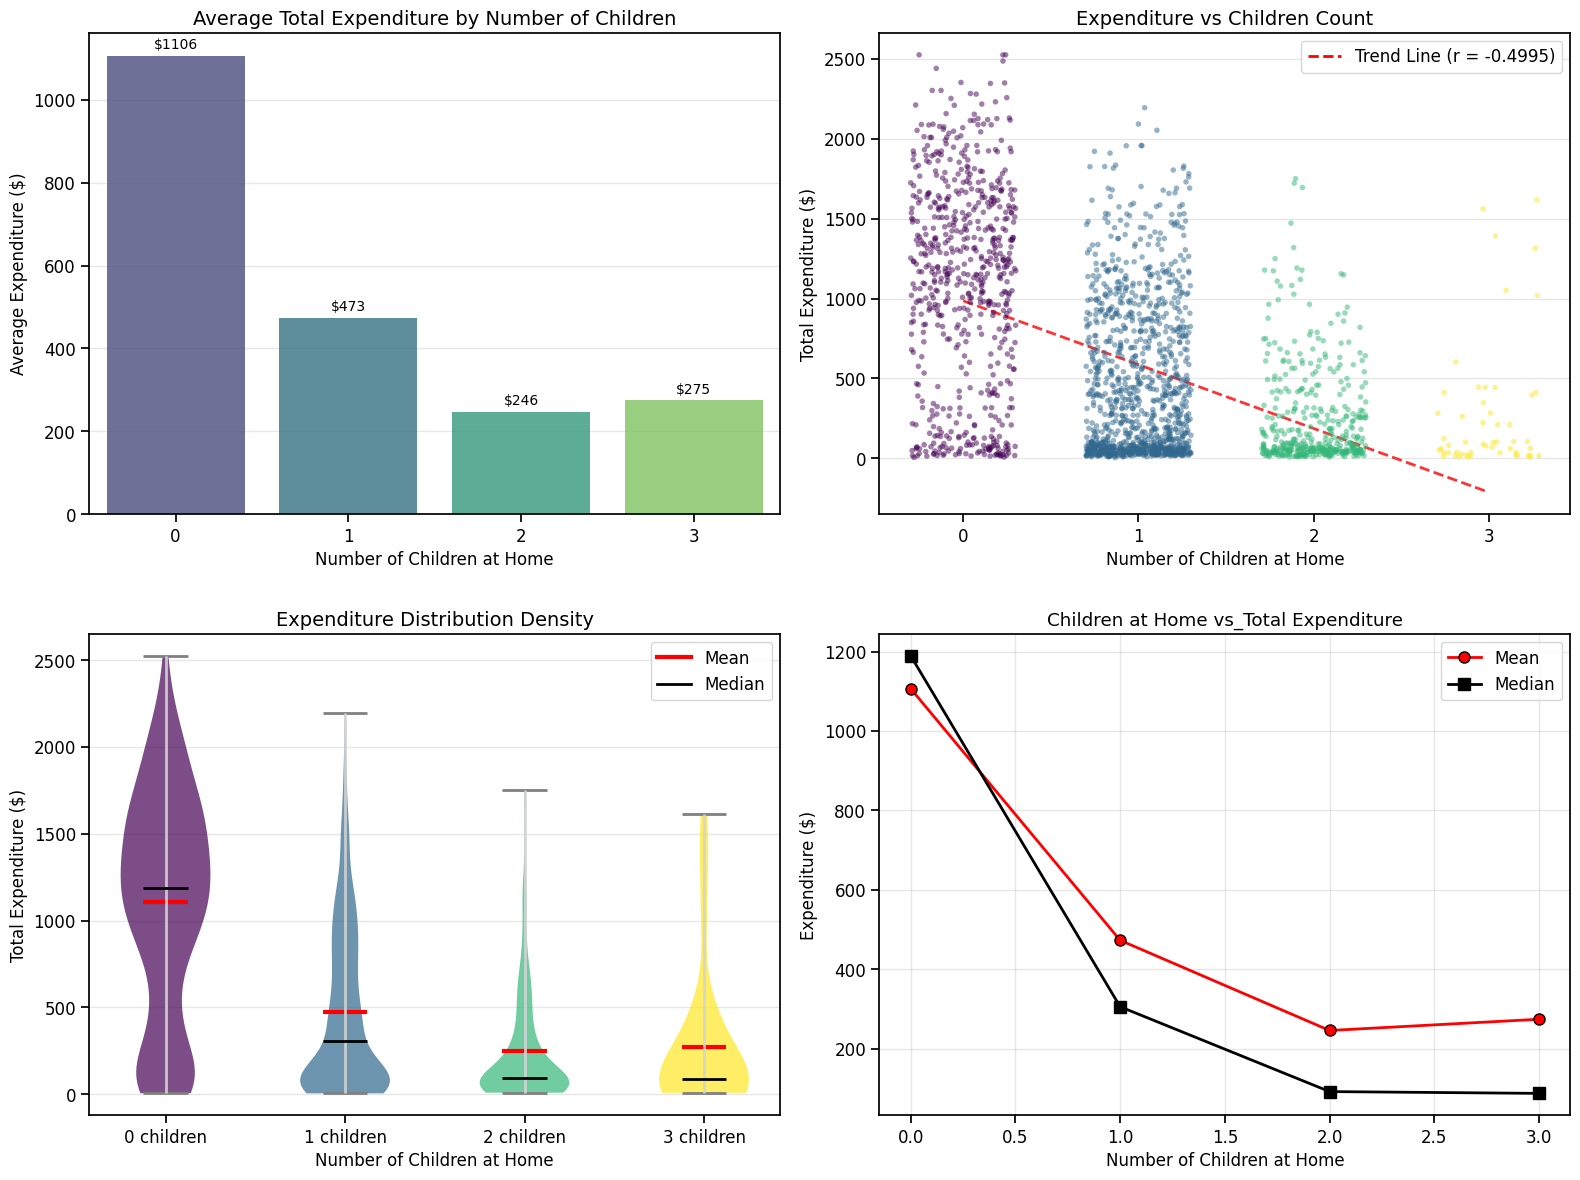

In [4]:
# Create visualizations

from matplotlib.lines import Line2D

# Set style for better-looking plots
reset_plot_settings()

#plt.style.use('seaborn-v0_8')
plt.style.use('default')
sns.set_palette("viridis")
sns.set_context('notebook', font_scale=1.1)

# 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# 1. Average Expenditure by Children Count (Bar Plot)
ax1.set_axisbelow(True)
ax1.grid(True, axis='y', alpha=0.3, zorder=0)

sns.barplot(data=df,
            x='Total_Children',
            y='Total_Spending',
            estimator='mean',
            ax=ax1,
            palette='viridis',
            alpha=0.8,
            errorbar=None)

# Add value labels on bars
bars = ax1.patches

for bar in bars:
  height = bar.get_height()
  ax1.text(bar.get_x() + bar.get_width()/2., height + 10,
           f'${height:.0f}',
           fontsize=10,
           ha='center',
           va='bottom')

ax1.set_title('Average Total Expenditure by Number of Children', fontsize=14)
ax1.set_xlabel('Number of Children at Home', fontsize=12)
ax1.set_ylabel('Average Expenditure ($)', fontsize=12)

# 2. Scatter plot with jitter
ax2.set_axisbelow(True)
ax2.grid(True, axis='y', alpha=0.3, zorder=0)

sns.stripplot(data=df,
              x='Total_Children',
              y='Total_Spending',
              size=4,
              alpha=0.5,
              jitter=0.3,
              ax=ax2,
              hue="Total_Children",
              palette='viridis',
              legend=False)

# Trendline
sns.regplot(data=df,
            x='Total_Children',
            y='Total_Spending',
            scatter=False,
            color='red',
            ci=None,
            ax=ax2,
            line_kws={'linestyle':'--', 'alpha':0.8, 'linewidth': 2,
                      'label': f'Trend Line (r={correlation:.3f})'})

# Create custom legend

# Add trend line to legend
legend_elements = []
legend_elements.append(Line2D([0], [0], color='red', linestyle='--',
                              linewidth=2, label=f'Trend Line (r = {correlation:.4f})'))

ax2.legend(handles=legend_elements, loc='best')

ax2.set_title('Expenditure vs Children Count', fontsize=14)
ax2.set_xlabel('Number of Children at Home', fontsize=12)
ax2.set_ylabel('Total Expenditure ($)', fontsize=12)

# 3. Violin Plot for Detailed Distribution
ax3.set_axisbelow(True)
ax3.grid(True, axis='y', alpha=0.3, zorder=0)

violin_data = []
violin_labels = []
for children in sorted(df['Total_Children'].unique()):
    data = df[df['Total_Children'] == children]['Total_Spending'].values
    if len(data) > 10:  # Only include if enough data points
        violin_data.append(data)
        violin_labels.append(f'{children} children')

parts = ax3.violinplot(violin_data, positions=range(len(violin_data)),
                      showmeans=True, showmedians=True, showextrema=True)

# Get viridis colors
n_violins = len(violin_data)
colors = plt.cm.viridis(np.linspace(0, 1, n_violins))

for pc, color in zip(parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)

if 'cbars' in parts:
    parts['cbars'].set_color('lightgrey')
    parts['cbars'].set_linewidth(2)
    parts['cbars'].set_alpha(0.9)

# Customize other elements
if 'cmeans' in parts:
    parts['cmeans'].set_color('red')
    parts['cmeans'].set_linewidth(3)

if 'cmedians' in parts:
    parts['cmedians'].set_color('black')
    parts['cmedians'].set_linewidth(2)

if 'cmins' in parts:
    parts['cmins'].set_color('gray')
    parts['cmins'].set_linewidth(2)

if 'cmaxes' in parts:
    parts['cmaxes'].set_color('gray')
    parts['cmaxes'].set_linewidth(2)

ax3.set_xticks(range(len(violin_labels)), violin_labels)
ax3.set_title('Expenditure Distribution Density', fontsize=14)
ax3.set_xlabel('Number of Children at Home', fontsize=12)
ax3.set_ylabel('Total Expenditure ($)', fontsize=12)

# Add legend

legend_elements = [Line2D([0], [0], color='red', linewidth=3, label='Mean'),
                  Line2D([0], [0], color='black', linewidth=2, label='Median')]
ax3.legend(handles=legend_elements, loc='upper right')

# 4. Median vs Mean Comparison
ax4.set_axisbelow(True)
ax4.grid(True, alpha=0.3, zorder=0)

children_counts = sorted(df['Total_Children'].unique())
means = [df[df['Total_Children'] == c]['Total_Spending'].mean() for c in children_counts]
medians = [df[df['Total_Children'] == c]['Total_Spending'].median() for c in children_counts]

ax4.plot(children_counts, means, 'o-', linewidth=2, markersize=8,
         label='Mean', color='red', markeredgecolor='black')
ax4.plot(children_counts, medians, 's-', linewidth=2, markersize=8,
         label='Median', color='black', markeredgecolor='black')

ax4.set_title('Mean vs Median Expenditure\nby Children Count', fontsize=14)
ax4.set_xlabel('Number of Children at Home', fontsize=12)
ax4.set_ylabel('Expenditure ($)', fontsize=12)
ax4.legend()

plt.tight_layout()
save_project_figure(
    "Children_at_Home_vs_Total_Expenditure", "Children at Home vs_Total Expenditure", config
)
plt.show()

In [5]:
# Additional Analysis: Effect Size and Practical Significance
print("\nDETAILED FINDINGS & INSIGHTS")
print("=" * 40)

# Calculate percentage decrease in spending
spending_0_children = df[df['Total_Children']==0]['Total_Spending'].mean()
spending_1_children = df[df['Total_Children']==1]['Total_Spending'].mean()
spending_2_children = df[df['Total_Children']==2]['Total_Spending'].mean()
spending_3_children = df[df['Total_Children']==3]['Total_Spending'].mean()

decrease_1_child = ((spending_0_children - spending_1_children) / spending_0_children) * 100
decrease_2_children = ((spending_0_children - spending_2_children) / spending_0_children) * 100
decrease_3_children = ((spending_0_children - spending_3_children) / spending_0_children) * 100

print("\nEXPENDITURE:")
print(f"• 0 children: ${spending_0_children:.0f} average expenditure")
print(f"• 1 child:    ${spending_1_children:.0f} average expenditure ({decrease_1_child:.1f}% decrease)")
print(f"• 2 children: ${spending_2_children:.0f} average expenditure ({decrease_2_children:.1f}% decrease)")
print(f"• 3 children: ${spending_3_children:.0f} average expenditure ({decrease_3_children:.1f}% decrease)")

print("\nIMPLICATIONS:")
print(f"• Childless households represent {children_dist[0]/len(df)*100:.1f}% of customers but highest value")
print(f"• Average spending ratio (0 vs 1 child): {spending_0_children/spending_1_children:.1f}:1")
print(f"• Average spending ratio (0 vs 2 children): {spending_0_children/spending_2_children:.1f}:1")
print(f"• Average spending ratio (0 vs 3+ children): {spending_0_children/spending_3_children:.1f}:1")
print("• Clear market segmentation opportunity based on family status")

print("\nCONCLUSION:")
print("• There is an inverse relationship between")
print("  the number of children at home and total expenditure.")
print("• This pattern is consistent across all statistical measures")

# Create a final summary table
print("\nSUMMARY TABLE:")
print("=" * 80)
summary_display = df.groupby('Total_Children')['Total_Spending'].agg([
    ('Sample Size', 'count'),
    ('Average Spending', 'mean'),
    ('Median Spending', 'median'),
    ('Standard Deviation', 'std')
]).copy() # type: ignore
# print(summary_display.round(2))

summary_display = summary_display.round(2)
summary_display['% of Total'] = (summary_display['Sample Size'] / len(df) * 100).round(1)
summary_display['Spending Ratio'] = (summary_display['Average Spending'] / spending_0_children).round(2)
summary_display = summary_display.reset_index()
summary_display = summary_display.rename(columns={'Total_Children': 'Number of Children'})
summary_display = summary_display.set_index('Number of Children')
print(summary_display.to_string())


DETAILED FINDINGS & INSIGHTS

EXPENDITURE:
• 0 children: $1106 average expenditure
• 1 child:    $473 average expenditure (57.2% decrease)
• 2 children: $246 average expenditure (77.7% decrease)
• 3 children: $275 average expenditure (75.2% decrease)

IMPLICATIONS:
• Childless households represent 28.4% of customers but highest value
• Average spending ratio (0 vs 1 child): 2.3:1
• Average spending ratio (0 vs 2 children): 4.5:1
• Average spending ratio (0 vs 3+ children): 4.0:1
• Clear market segmentation opportunity based on family status

CONCLUSION:
• There is an inverse relationship between
  the number of children at home and total expenditure.
• This pattern is consistent across all statistical measures

SUMMARY TABLE:
                    Sample Size  Average Spending  Median Spending  Standard Deviation  % of Total  Spending Ratio
Number of Children                                                                                                
0                           633  

In [6]:
# DETAILED FINDINGS & INSIGHTS
# ========================================

# EXPENDITURE:
# • 0 children: $1106 average expenditure
# • 1 child:    $473 average expenditure (57.2% decrease)
# • 2 children: $246 average expenditure (77.7% decrease)
# • 3 children: $275 average expenditure (75.2% decrease)

# IMPLICATIONS:
# • Childless households represent 28.4% of customers but highest value
# • Average spending ratio (0 vs 1 child): 2.3:1
# • Average spending ratio (0 vs 2 children): 4.5:1
# • Average spending ratio (0 vs 3+ children): 4.0:1
# • Clear market segmentation opportunity based on family status

# CONCLUSION:
# • There is an inverse relationship between
#   the number of children at home and total expenditure.
# • This pattern is consistent across all statistical measures

In [7]:

# Save results for next notebook
# save_intermediate_results(df_processed, 'processed_data.pkl', config)
# save_intermediate_results(analysis_results, 'analysis_results.pkl', config)
# print('✓ Results saved for next notebook')